# **Prueba técnica Claro Insurance**. 

## Realizado por: Juan David García Castro.

### Correo: juancastro97125@gmail.com 

## **1) Preparación de los datos.**

### **Librerias**

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

from scipy.cluster.hierarchy import dendrogram,linkage

sns.set()

### **Lectura de las tablas**. 

In [4]:
xls = pd.ExcelFile('sales.xlsx')
df_sales_data_sample = pd.read_excel(xls,'sales_data_sample')
df_detalle_orden = pd.read_excel(xls,'DetalleOrden')
df_producto = pd.read_excel(xls,'Producto')
df_cliente = pd.read_excel(xls,'Cliente')
df_orden  = pd.read_excel(xls,'Orden')


In [5]:
df_sales_data_sample.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
1,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
3,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
4,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium


## **Tarea 1 : Análisis descriptivo.**

### **Ventas por cada línea.**

In [9]:
df_total_lineas = df_sales_data_sample[['SALES','QUANTITYORDERED','PRODUCTLINE']].groupby(['PRODUCTLINE'],as_index = False).sum()
df_total_lineas = df_total_lineas.sort_values(['SALES'],ascending = False)
df_total_lineas['PROPORTION'] = df_total_lineas['SALES'] /df_total_lineas['SALES'].sum()
df_total_lineas = df_total_lineas.round(2)

### Top 5 líneas de producto más vendidas.

In [89]:
df_total_lineas.head()

,PRODUCTLINE,SALES,QUANTITYORDERED,PROPORTION
0,Classic Cars,3919615.66,33992,0.39
6,Vintage Cars,1903150.84,21069,0.19
1,Motorcycles,1166388.34,11663,0.12
5,Trucks and Buses,1127789.84,10777,0.11
2,Planes,975003.57,10727,0.10


### Linea más vendida.

In [10]:
linea_mas_vendida = df_total_lineas.iloc[0]
print('La línea más vendida es {} con un total de ventas de ${} y {} unidades pedidas.'.format(linea_mas_vendida[0],round(linea_mas_vendida[1],2),linea_mas_vendida[2]))

La línea más vendida es Classic Cars con un total de ventas de $3919615.66 y 33992 unidades pedidas.


### Top 5 líneas de producto menos vendidas.

In [90]:
df_total_lineas.tail()

,PRODUCTLINE,SALES,QUANTITYORDERED,PROPORTION
1,Motorcycles,1166388.34,11663,0.12
5,Trucks and Buses,1127789.84,10777,0.11
2,Planes,975003.57,10727,0.10
3,Ships,714437.13,8127,0.07
4,Trains,226243.47,2712,0.02


### Linea menos vendida. 

In [11]:
linea_menos_vendida = df_total_lineas.iloc[-1]
print('La línea menos vendida es {} con un total de ventas de ${} y {} unidades pedidas.'.format(linea_menos_vendida[0],round(linea_menos_vendida[1],2),linea_menos_vendida[2]))

La línea menos vendida es Trains con un total de ventas de $226243.47 y 2712 unidades pedidas.


### **Proporción de las compras en la tienda por línea de producto.** 

In [12]:
fig = px.pie(df_total_lineas, values='PROPORTION', names='PRODUCTLINE',
             title='Ventas de las líneas de la tienda.',
             hover_data= ['SALES'], labels={'SALES':'ventas'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### **Ventas por producto.**

In [219]:
df_productos =df_detalle_orden[['PRODUCTCODE','SALES','QUANTITYORDERED']].groupby(['PRODUCTCODE'],as_index = False).sum()
df_productos = df_productos.sort_values(['SALES'],ascending=False)

### TOP 5 productos más vendidos. 

In [14]:
df_productos.head()

,PRODUCTCODE,SALES,QUANTITYORDERED
39,S18_3232,288245.42,1774
1,S10_1949,191073.03,961
3,S10_4698,170401.07,921
7,S12_1108,168585.32,973
25,S18_2238,154623.95,966


### Producto más vendido de la tienda.

In [15]:
producto_mas_vendido = df_productos.iloc[0]
print('El código del producto más vendido es: {} con un total de ventas de ${} y {} unidades pedidas.'.format(producto_mas_vendido[0],round(producto_mas_vendido[1],2),producto_mas_vendido[2]))

El código del producto más vendido es: S18_3232 con un total de ventas de $288245.42 y 1774 unidades pedidas.


### Top 5 productos menos vendidos en la tienda. 

In [16]:
df_productos.tail()

,PRODUCTCODE,SALES,QUANTITYORDERED
57,S24_1628,46676.51,883
69,S24_2972,46515.92,912
62,S24_2022,44667.16,851
85,S32_2206,41353.43,836
78,S24_3969,33181.66,745


### Producto menos vendido de la tienda.

In [17]:
producto_menos_vendido = df_productos.iloc[-1]
print('El código del producto menos vendido es: {} con un total de ventas de ${} y {} unidades pedidas.'.format(producto_menos_vendido[0],round(producto_menos_vendido[1],2),producto_menos_vendido[2]))

El código del producto menos vendido es: S24_3969 con un total de ventas de $33181.66 y 745 unidades pedidas.


### **Ventas por cliente.**

In [113]:
df_total_clientes = df_sales_data_sample[['SALES','QUANTITYORDERED','CUSTOMERNAME']].groupby(['CUSTOMERNAME'],as_index = False).sum()
df_total_clientes = df_total_clientes.sort_values(['SALES'],ascending = False)
df_total_clientes['PROPORTION'] = df_total_clientes['SALES'] /df_total_clientes['SALES'].sum()
df_total_clientes = df_total_clientes.round(2)

### Top 5 clientes con más compras. 

In [114]:
df_total_clientes.head()

,CUSTOMERNAME,SALES,QUANTITYORDERED,PROPORTION
33,Euro Shopping Channel,912294.11,9327,0.09
55,Mini Gifts Distributors Ltd.,654858.06,6366,0.07
6,"Australian Collectors, Co.",200995.41,1926,0.02
58,Muscle Machine Inc,197736.94,1775,0.02
44,La Rochelle Gifts,180124.90,1832,0.02


In [20]:
cliente_mas_compras = df_total_clientes.iloc[0]
print('El cliente que más compró es {} con un total de compras de ${} y {} unidades pedidas.'.format(cliente_mas_compras[0],round(cliente_mas_compras[1],2),cliente_mas_compras[2]))

El cliente que más compró es Euro Shopping Channel con un total de compras de $912294.11 y 9327 unidades pedidas.


### Top 5 clientes con menos compras. 

In [21]:
df_total_clientes.tail()

,CUSTOMERNAME,SALES,QUANTITYORDERED,PROPORTION
69,Royale Belge,33440.10,278,0.0
50,Microscale Inc.,33144.93,381,0.0
10,Auto-Moto Classics Inc.,26479.26,287,0.0
4,Atelier graphique,24179.96,270,0.0
14,Boards & Toys Co.,9129.35,102,0.0


In [22]:
cliente_menos_compras = df_total_clientes.iloc[-1]
print('El cliente que menos compró es {} con un total de compras de ${} y {} unidades pedidas.'.format(cliente_menos_compras[0],round(cliente_menos_compras[1],2),cliente_menos_compras[2]))

El cliente que menos compró es Boards & Toys Co. con un total de compras de $9129.35 y 102 unidades pedidas.


### **Ventas por país**.

In [23]:
df_total_paises = df_sales_data_sample[['SALES','QUANTITYORDERED','COUNTRY']].groupby(['COUNTRY'],as_index = False).sum()
df_total_paises = df_total_paises.sort_values(['SALES'],ascending = False)
df_total_paises['PROPORTION'] = df_total_paises['SALES'] /df_total_paises['SALES'].sum()
df_total_paises = df_total_paises.round(2)

### Top 5 paises con más compras.

In [24]:
df_total_paises.head()

,COUNTRY,SALES,QUANTITYORDERED,PROPORTION
18,USA,3627982.83,35659,0.36
14,Spain,1215686.92,12429,0.12
6,France,1110916.52,11090,0.11
0,Australia,630623.10,6246,0.06
17,UK,478880.46,5013,0.05


### Pais con más compras. 

In [220]:
pais_mas_compras = df_total_paises.iloc[0]
print('El país que más compró es {} con un total de compras de ${} y {} unidades pedidas.'.format(pais_mas_compras[0],round(pais_mas_compras[1],2),pais_mas_compras[2]))

El país que más compró es USA con un total de compras de $3627982.83 y 35659 unidades pedidas.


### Top 5 paises con menos compras.

In [26]:
df_total_paises.tail()

,COUNTRY,SALES,QUANTITYORDERED,PROPORTION
10,Japan,188167.81,1842,0.02
16,Switzerland,117713.56,1078,0.01
2,Belgium,108412.62,1074,0.01
12,Philippines,94015.73,961,0.01
8,Ireland,57756.43,490,0.01


### Pais con menos compras. 

In [221]:
pais_menos_compras = df_total_paises.iloc[-1]
print('El país que menos compró es {} con un total de compras de ${} y {} unidades pedidas.'.format(pais_menos_compras[0],round(pais_menos_compras[1],2),pais_menos_compras[2]))

El país que menos compró es Ireland con un total de compras de $57756.43 y 490 unidades pedidas.


### **Proporción de compras en la tienda por paises**. 

In [28]:
fig = px.pie(df_total_paises, values='PROPORTION', names='COUNTRY',
             title='Ventas de los paises de la tienda.',
             hover_data= ['SALES'], labels={'SALES':'ventas'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### **Ventas por mes del año.**

In [29]:
df_meses = df_sales_data_sample.copy()
df_meses['MONTH_ID'] = pd.to_datetime(df_meses['MONTH_ID'],format='%m').dt.month_name()
month_group = df_meses.groupby('MONTH_ID')
sales_by_month = month_group['SALES'].sum()
sales_by_month = sales_by_month.to_frame()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_by_month = sales_by_month.reindex(new_order, axis=0)
sales_by_month = sales_by_month.reset_index()
sales_by_month

,MONTH_ID,SALES
0,January,785874.44
1,February,810441.90
2,March,754501.39
3,April,669390.96
4,May,923972.56
5,June,454756.78
6,July,514875.97
7,August,659310.57
8,September,584724.27
9,October,1121215.22


In [30]:
fig = px.line(sales_by_month, x='MONTH_ID', 
              y='SALES',
              title = 'Compras por mes del año.',
              markers=True)
fig.show()


## **Tarea 2 : Segmentación de clientes RFM**

### **1) Recencia para cada cliente.**

#### Dias transcurridos desde la última compra.

#### Se asume que el día con base en el cual se compara esto es el 5/31/2005.

In [33]:
date_by_client = df_sales_data_sample.groupby('CUSTOMERNAME')
last_sale_date = date_by_client['ORDERDATE'].last()
last_sale_date = last_sale_date.to_frame()
last_sale_date['ORDERDATE'] = pd.to_datetime(last_sale_date['ORDERDATE'])
date_to_compare = last_sale_date['ORDERDATE'].max()
last_sale_date['DAYS SINCE LAST PURCHASE'] = date_to_compare - last_sale_date['ORDERDATE']
last_sale_date = last_sale_date.sort_values(['DAYS SINCE LAST PURCHASE'],ascending=True)
last_sale_date.drop(['ORDERDATE'],axis=1,inplace=True)
last_sale_date.head()

,DAYS SINCE LAST PURCHASE
CUSTOMERNAME,
La Rochelle Gifts,0 days
Euro Shopping Channel,0 days
Diecast Classics Inc.,1 days
Petit Auto,1 days
Mini Gifts Distributors Ltd.,2 days


In [222]:
last_sale_date.tail()

,DAYS SINCE LAST PURCHASE
CUSTOMERNAME,
Signal Collectibles Ltd.,476 days
West Coast Collectables Co.,488 days
"Double Decker Gift Stores, Ltd",495 days
"Men 'R' US Retailers, Ltd.",508 days
"Norway Gifts By Mail, Co.",604 days


### **2) Frecuencia para cada cliente.**

#### Número de compras realizadas en un periodo de tiempo. 

#### Se entiende esto como cuántas veces ordeno el cliente a la tienda un encargo. 

In [34]:
df_frecuencia_clientes = df_sales_data_sample[['ORDERNUMBER','CUSTOMERNAME']].groupby(['CUSTOMERNAME'],as_index = False).count()
df_frecuencia_clientes = df_frecuencia_clientes.rename(columns={'ORDERNUMBER':'FRECUENCY'})
df_frecuencia_clientes = df_frecuencia_clientes.sort_values(['FRECUENCY'],ascending = False)
df_frecuencia_clientes.set_index('CUSTOMERNAME',inplace=True)
df_frecuencia_clientes

,FRECUENCY
CUSTOMERNAME,
Euro Shopping Channel,259
Mini Gifts Distributors Ltd.,180
"Australian Collectors, Co.",55
La Rochelle Gifts,53
"AV Stores, Co.",51
...,...
Microscale Inc.,10
Royale Belge,8
Auto-Moto Classics Inc.,8


### **3) Valor monetario para cada cliente.**


#### Valor de las compras totales en un periodo de tiempo. 

In [35]:
df_valor_monetario_clientes = df_sales_data_sample[['SALES','CUSTOMERNAME']].groupby(['CUSTOMERNAME'],as_index = False).sum()
df_valor_monetario_clientes = df_valor_monetario_clientes.sort_values(['SALES'],ascending = False)
df_valor_monetario_clientes = df_valor_monetario_clientes.round(2)
df_valor_monetario_clientes.set_index('CUSTOMERNAME',inplace=True)
df_valor_monetario_clientes

,SALES
CUSTOMERNAME,
Euro Shopping Channel,912294.11
Mini Gifts Distributors Ltd.,654858.06
"Australian Collectors, Co.",200995.41
Muscle Machine Inc,197736.94
La Rochelle Gifts,180124.90
...,...
Royale Belge,33440.10
Microscale Inc.,33144.93
Auto-Moto Classics Inc.,26479.26


## **TABLA RFM**

In [36]:
df_rfm= last_sale_date.join(df_frecuencia_clientes)
df_rfm = df_rfm.join(df_valor_monetario_clientes)
df_rfm

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES
CUSTOMERNAME,,,
La Rochelle Gifts,0 days,53,180124.90
Euro Shopping Channel,0 days,259,912294.11
Diecast Classics Inc.,1 days,31,122138.14
Petit Auto,1 days,25,74972.52
Mini Gifts Distributors Ltd.,2 days,180,654858.06
...,...,...,...
Signal Collectibles Ltd.,476 days,15,50218.51
West Coast Collectables Co.,488 days,13,46084.64
"Double Decker Gift Stores, Ltd",495 days,12,36019.04


## **Tarea 3: Segmentación por clustering.**

In [39]:
df_total_clientes.set_index(['CUSTOMERNAME'],inplace=True)

In [40]:
df_segmentation = df_rfm.copy()
df_segmentation['DAYS SINCE LAST PURCHASE'] = df_segmentation['DAYS SINCE LAST PURCHASE'].dt.days
df_segmentation['QUANTITYORDERED'] = df_total_clientes['QUANTITYORDERED']

In [218]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

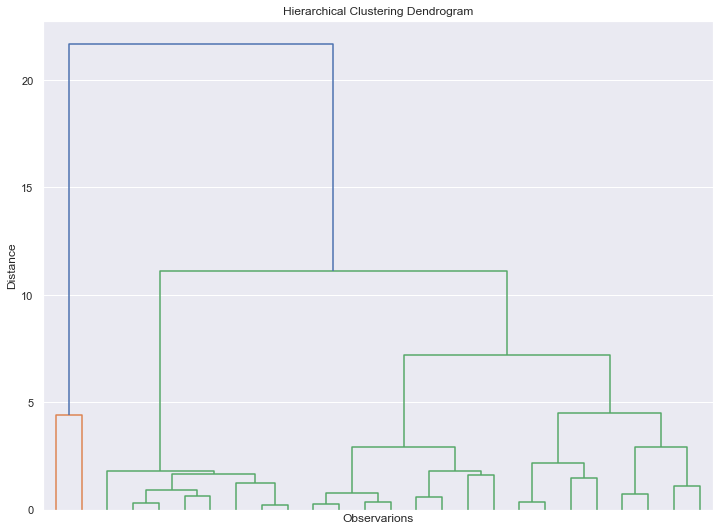

In [44]:
hier_clust = linkage(segmentation_std,method='ward')
plt.figure(figsize =(12,9))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observarions')
plt.ylabel('Distance')

dendrogram(hier_clust,
           truncate_mode= 'level',
           p =5,
           show_leaf_counts = False,
           no_labels = True
          )

plt.show()


In [45]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



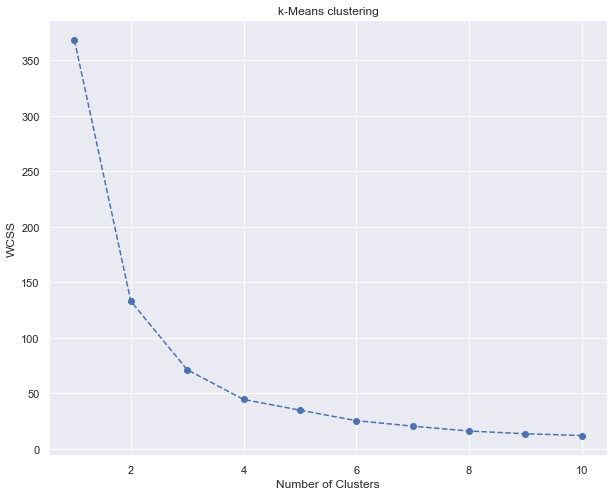

In [46]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('k-Means clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', random_state=42)

In [48]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=3, random_state=42)

In [49]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [50]:
df_segm_kmeans

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES,QUANTITYORDERED,Segment K-means
CUSTOMERNAME,,,,,
La Rochelle Gifts,0,53,180124.90,1832,1
Euro Shopping Channel,0,259,912294.11,9327,2
Diecast Classics Inc.,1,31,122138.14,1111,1
Petit Auto,1,25,74972.52,796,1
Mini Gifts Distributors Ltd.,2,180,654858.06,6366,2
...,...,...,...,...,...
Signal Collectibles Ltd.,476,15,50218.51,514,0
West Coast Collectables Co.,488,13,46084.64,511,0
"Double Decker Gift Stores, Ltd",495,12,36019.04,357,0


In [51]:
df_segm_kmeans.columns

Index(['DAYS SINCE LAST PURCHASE', 'FRECUENCY', 'SALES', 'QUANTITYORDERED',
       'Segment K-means'],
      dtype='object')

In [52]:
df_segm_kmeans['Legend'] = df_segm_kmeans['Segment K-means'].map({0:'Perdidos',1:'Promedio',2:'Potenciales'})

In [53]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES,QUANTITYORDERED
Segment K-means,,,,
0,460.153846,18.692308,66365.643077,661.384615
1,143.701299,27.805195,98736.666494,971.116883
2,1.000000,219.500000,783576.085000,7846.500000


In [54]:
segmento_0 = df_segm_analysis.iloc[0]
print('El segmento 0 está conformado por personas que en promedio su última compra fue hace {} días, con un número promedio de compras de {}, cuyo valor promedio es de ${} y {} unidades ordenadas en promedio.'.format(round(segmento_0[0],1),
                                                                                                                                                                                                     round(segmento_0[1],1),
                                                                                                                                                                                                     round(segmento_0[2],1),
                                                                                                                                                                                                     round(segmento_0[3],1)))

El segmento 0 está conformado por personas que en promedio su última compra fue hace 460.2 días, con un número promedio de compras de 18.7, cuyo valor promedio es de $66365.6 y 661.4 unidades ordenadas en promedio.


In [55]:
segmento_1 = df_segm_analysis.iloc[1]
print('El segmento 1 está conformado por personas que en promedio su última compra fue hace {} días, con un número promedio de compras de  {}, cuyo valor promedio es de ${} y {} unidades ordenadas en promedio.'.format(round(segmento_1[0],1),
                                                                                                                                                                                                     round(segmento_1[1],1),
                                                                                                                                                                                                     round(segmento_1[2],1),
                                                                                                                                                                                                     round(segmento_1[3],1)))

El segmento 1 está conformado por personas que en promedio su última compra fue hace 143.7 días, con un número promedio de compras de  27.8, cuyo valor promedio es de $98736.7 y 971.1 unidades ordenadas en promedio.


In [56]:
segmento_2 = df_segm_analysis.iloc[2]
print('El segmento 2 está conformado por personas que en promedio su última compra fue hace {} días, con un número promedio de compras de {}, cuyo valor promedio es de ${} y {} unidades ordenadas en promedio.'.format(round(segmento_2[0],1),
                                                                                                                                                                                                     round(segmento_2[1],1),
                                                                                                                                                                                                     round(segmento_2[2],1),
                                                                                                                                                                                                     round(segmento_2[3],1)))

El segmento 2 está conformado por personas que en promedio su última compra fue hace 1.0 días, con un número promedio de compras de 219.5, cuyo valor promedio es de $783576.1 y 7846.5 unidades ordenadas en promedio.


### Visualización de la segmentación con base a los días transcurridos desde la última compra. 

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



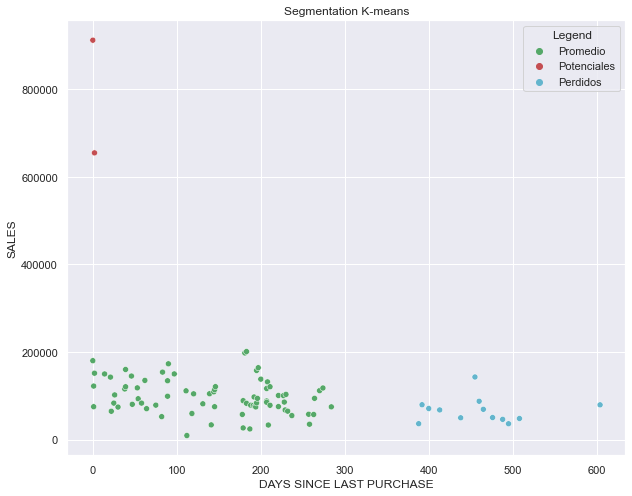

In [57]:
x_axis = df_segm_kmeans['DAYS SINCE LAST PURCHASE']
y_axis = df_segm_kmeans['SALES']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Legend'],palette = ['g','r','c'])
plt.title('Segmentation K-means')
plt.show()

### Visualización de la segmentación con base a la cantidad ordenada. 

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



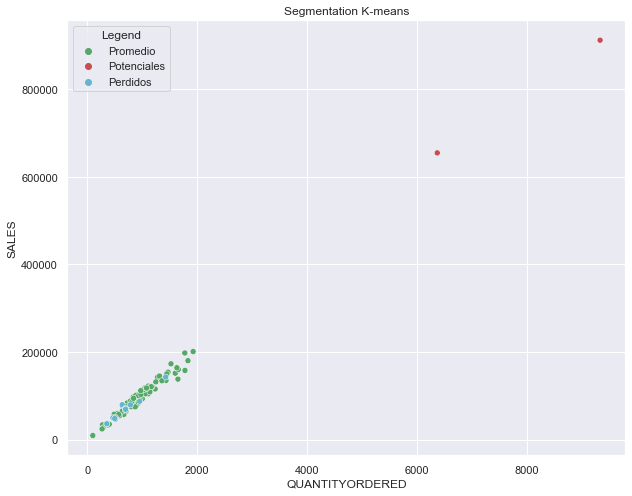

In [58]:
x_axis = df_segm_kmeans['QUANTITYORDERED']
y_axis = df_segm_kmeans['SALES']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Legend'],palette = ['g','r','c'])
plt.title('Segmentation K-means')
plt.show()

### Visualización de la segmentación con base a la frecuencia de compra. 

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



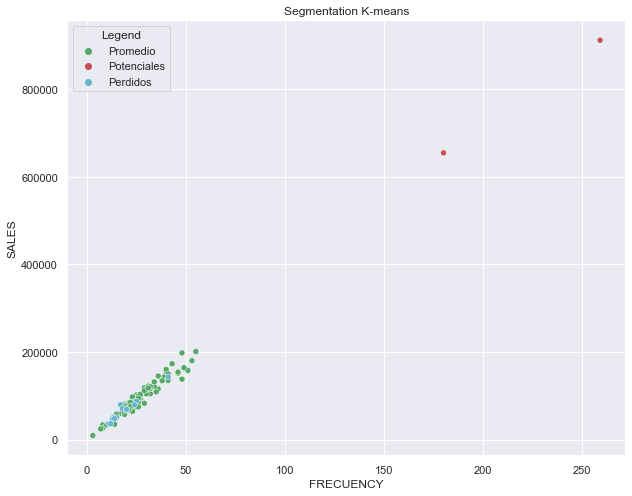

In [59]:
x_axis = df_segm_kmeans['FRECUENCY']
y_axis = df_segm_kmeans['SALES']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Legend'],palette = ['g','r','c'])
plt.title('Segmentation K-means')
plt.show()

### **Clientes potenciales**

In [225]:
df_potenciales = df_segm_kmeans[df_segm_kmeans['Legend'] == 'Potenciales']
df_potenciales

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES,QUANTITYORDERED,Segment K-means,Legend
CUSTOMERNAME,,,,,,
Euro Shopping Channel,0,259,912294.11,9327,2,Potenciales
Mini Gifts Distributors Ltd.,2,180,654858.06,6366,2,Potenciales


In [224]:
df_potenciales.shape

(2, 6)

### **Clientes promedio**

In [61]:
df_promedio = df_segm_kmeans[df_segm_kmeans['Legend'] == 'Promedio']
df_promedio

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES,QUANTITYORDERED,Segment K-means,Legend
CUSTOMERNAME,,,,,,
La Rochelle Gifts,0,53,180124.90,1832,1,Promedio
Diecast Classics Inc.,1,31,122138.14,1111,1,Promedio
Petit Auto,1,25,74972.52,796,1,Promedio
Souveniers And Things Co.,2,46,151570.98,1601,1,Promedio
Salzburg Collectables,14,40,149798.63,1442,1,Promedio
...,...,...,...,...,...,...
Online Mini Collectables,263,15,57197.96,572,1,Promedio
Amica Models & Co.,264,26,94117.26,843,1,Promedio
Herkku Gifts,270,29,111640.28,973,1,Promedio


In [226]:
df_promedio.shape

(77, 6)

### **Clientes perdidos**

In [62]:
df_perdidos = df_segm_kmeans[df_segm_kmeans['Legend'] == 'Perdidos']
df_perdidos

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES,QUANTITYORDERED,Segment K-means,Legend
CUSTOMERNAME,,,,,,
Cambridge Collectables Co.,388,11,36163.62,357,0,Perdidos
Super Scale Inc.,392,17,79472.07,636,0,Perdidos
Diecast Collectables,400,18,70859.78,695,0,Perdidos
Osaka Souveniers Co.,413,20,67605.07,692,0,Perdidos
CAF Imports,438,13,49642.05,468,0,Perdidos
"Saveley & Henriot, Co.",455,41,142874.25,1428,0,Perdidos
Collectable Mini Designs Co.,460,25,87489.23,954,0,Perdidos
Daedalus Designs Imports,465,20,69052.41,699,0,Perdidos
Signal Collectibles Ltd.,476,15,50218.51,514,0,Perdidos


In [228]:
df_perdidos.shape

(13, 6)

### El resultado del método de K-means es satisfactorio sin embargo se revisará si llevando acabo un PCA con los features del dataset, se puede obtener una mejor predicción. 

## **PCA**

In [63]:
pca = PCA()

In [64]:
pca.fit(segmentation_std)

PCA()

In [65]:
pca.explained_variance_ratio_

array([7.82618454e-01, 2.15893579e-01, 1.15045454e-03, 3.37512735e-04])

Text(0, 0.5, ' Cummulative Explained variance')

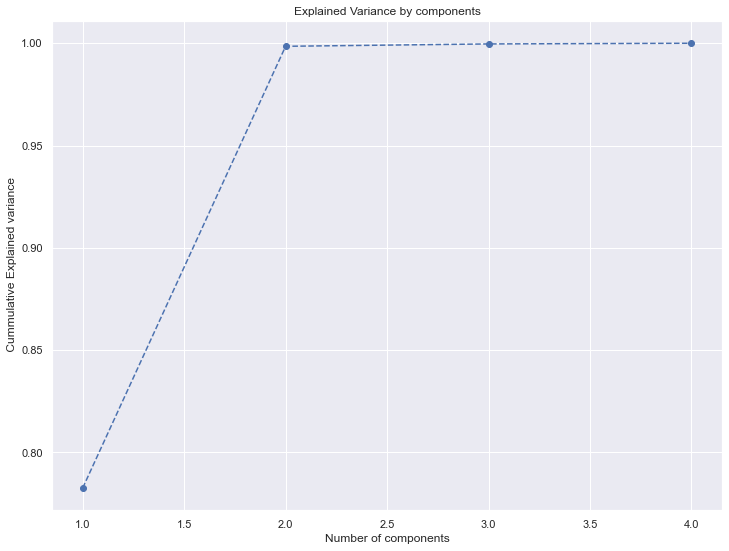

In [66]:
plt.figure(figsize=(12,9))
plt.plot(range(1,5),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by components')
plt.xlabel('Number of components')
plt.ylabel(' Cummulative Explained variance')

In [67]:
pca = PCA(n_components=2)
pca.fit(segmentation_std)

PCA(n_components=2)

In [68]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns= df_segmentation.columns.values,
                           index = ['Component 1','Component 2'])

In [69]:
df_pca_comp

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES,QUANTITYORDERED
Component 1,-0.245340,0.559589,0.559719,0.559807
Component 2,0.969423,0.143921,0.137296,0.143719


([<matplotlib.axis.YTick at 0x2834f6fffd0>,
 [Text(0, 0, 'Component 1'), Text(0, 1, 'Component 2')])

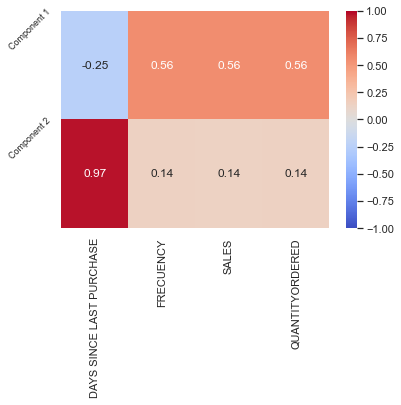

In [70]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm',
            annot = True)

plt.yticks([0,1],
           ['Component 1','Component 2'],
           rotation = 45, fontsize = 9 )

In [71]:
scores_pca = pca.transform(segmentation_std)

In [72]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



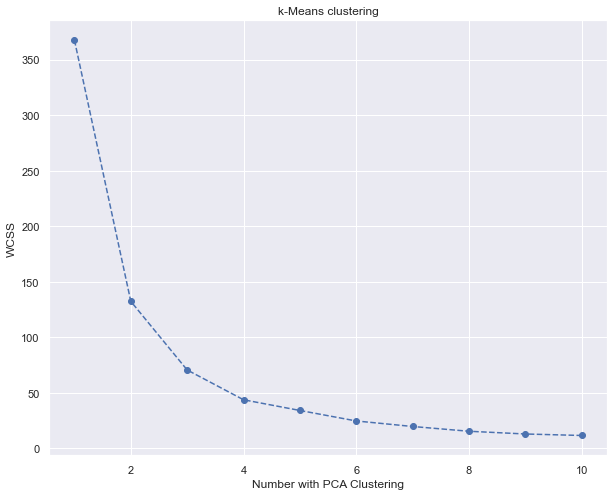

In [73]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('k-Means clustering')
plt.xlabel('Number with PCA Clustering')
plt.ylabel('WCSS')
plt.show()

In [74]:
kmeans_pca = KMeans(n_clusters=3 ,init = 'k-means++', random_state=42)

In [75]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [76]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)


In [77]:
df_segm_pca_kmeans.head()

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES,QUANTITYORDERED,0,1
0,0,53,180124.90,1832,1.482695,-1.015057
1,0,259,912294.11,9327,12.770776,1.841937
2,1,31,122138.14,1111,0.418813,-1.277479
3,1,25,74972.52,796,-0.090902,-1.405636
4,2,180,654858.06,6366,8.513373,0.778314


In [78]:
df_segm_pca_kmeans.columns.values[-2:] = ['Component 1','Component 2']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [79]:
df_segm_pca_kmeans.head()

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES,QUANTITYORDERED,Component 1,Component 2,Segment K-means PCA
0,0,53,180124.90,1832,1.482695,-1.015057,1
1,0,259,912294.11,9327,12.770776,1.841937,2
2,1,31,122138.14,1111,0.418813,-1.277479,1
3,1,25,74972.52,796,-0.090902,-1.405636,1
4,2,180,654858.06,6366,8.513373,0.778314,2


In [80]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES,QUANTITYORDERED,Component 1,Component 2
Segment K-means PCA,,,,,,
0,460.153846,18.692308,66365.643077,661.384615,-1.137351,1.774484
1,143.701299,27.805195,98736.666494,971.116883,-0.084397,-0.333617
2,1.000000,219.500000,783576.085000,7846.500000,10.642074,1.310125


In [81]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'Perdidos',1:'Promedio',2:'Potenciales'})

In [82]:
df_segm_pca_kmeans_freq

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES,QUANTITYORDERED,Component 1,Component 2
Segment K-means PCA,,,,,,
Perdidos,460.153846,18.692308,66365.643077,661.384615,-1.137351,1.774484
Promedio,143.701299,27.805195,98736.666494,971.116883,-0.084397,-0.333617
Potenciales,1.000000,219.500000,783576.085000,7846.500000,10.642074,1.310125


In [83]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'Perdidos',1:'Promedio',2:'Potenciales'})

In [84]:
df_segm_pca_kmeans.head()

,DAYS SINCE LAST PURCHASE,FRECUENCY,SALES,QUANTITYORDERED,Component 1,Component 2,Segment K-means PCA,Legend
0,0,53,180124.90,1832,1.482695,-1.015057,1,Promedio
1,0,259,912294.11,9327,12.770776,1.841937,2,Potenciales
2,1,31,122138.14,1111,0.418813,-1.277479,1,Promedio
3,1,25,74972.52,796,-0.090902,-1.405636,1,Promedio
4,2,180,654858.06,6366,8.513373,0.778314,2,Potenciales


C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



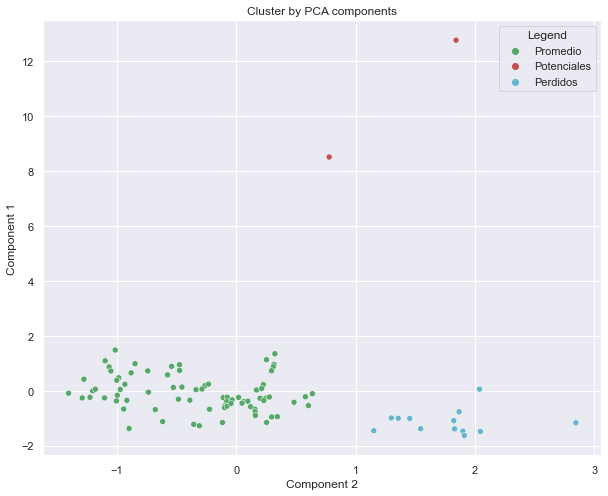

In [85]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue = df_segm_pca_kmeans['Legend'],palette=['g','r','c'])
plt.title('Cluster by PCA components')
plt.show()

### Al final con este método obtuvimos un resultado casi idéntico al primero. Por lo tanto podemos hacer uso de cualquiera para segmentar a los clientes. 

## **Tarea 4: Modelo de sistema de recomendación.**

#### Recomendación de productos haciendo uso de la similitud del coseno. 

In [146]:
sales_df  = df_sales_data_sample[['ORDERNUMBER','PRODUCTCODE','PRODUCTLINE','QUANTITYORDERED','PRICEEACH','SALES']]
sales_df.head()

,ORDERNUMBER,PRODUCTCODE,PRODUCTLINE,QUANTITYORDERED,PRICEEACH,SALES
0,10100,S18_1749,Vintage Cars,30,100.00,5151.00
1,10100,S18_2248,Vintage Cars,50,67.80,3390.00
2,10100,S18_4409,Vintage Cars,22,86.51,1903.22
3,10100,S24_3969,Vintage Cars,49,34.47,1689.03
4,10101,S18_2325,Vintage Cars,25,100.00,3782.00


In [147]:
pivot_df = pd.pivot_table(sales_df,index = 'ORDERNUMBER',columns = 'PRODUCTCODE',values = 'PRODUCTLINE',aggfunc = 'count')
pivot_df.reset_index(inplace=True)
pivot_df = pivot_df.fillna(0)
pivot_df = pivot_df.drop('ORDERNUMBER', axis=1)

In [149]:
co_matrix = pivot_df.T.dot(pivot_df)
np.fill_diagonal(co_matrix.values, 0)

In [151]:
cos_score_df = pd.DataFrame(cosine_similarity(co_matrix))
cos_score_df.index = co_matrix.index
cos_score_df.columns = np.array(co_matrix.index)

In [207]:
#Take top five scoring recs that aren't the original product
product_recs = []
for i in cos_score_df.index:
    product_recs.append(cos_score_df[cos_score_df.index!=i][i].sort_values(ascending = False)[0:5].index)
    
product_recs_df = pd.DataFrame(product_recs)
product_recs_df.index = cos_score_df.index
product_recs_df.rename(columns ={0:'Combo 1',1:'Combo 2',2:'Combo 3'},inplace=True)
product_recs_df = product_recs_df[['Combo 1','Combo 2','Combo 3']]


In [217]:
product_recs_df.head()

,Combo 1,Combo 2,Combo 3
PRODUCTCODE,,,
S10_1678,S18_2625,S10_4698,S24_1578
S10_1949,S18_1097,S12_1666,S18_3136
S10_2016,S24_2000,S10_4698,S24_1578
S10_4698,S24_2000,S10_1678,S10_2016
S10_4757,S700_2610,S24_3816,S18_3029


### **Predicción.**

In [210]:
usuario_1_productos = ['S10_1678','S10_4698','S700_4002']
usuario_1_cantidades = [15,50,8]
d = {'Producto':usuario_1_productos,'Cantidad':usuario_1_cantidades}
usuario_1 = pd.DataFrame(data = d)
usuario_1

,Producto,Cantidad
0,S10_1678,15
1,S10_4698,50
2,S700_4002,8


In [215]:
cantidad_mayor = usuario_1['Cantidad'].max()
producto_mas_vendido = usuario_1[usuario_1['Cantidad']==cantidad_mayor]['Producto']

cantidad_menor = usuario_1['Cantidad'].min()
producto_menos_vendido = usuario_1[usuario_1['Cantidad']==cantidad_menor]['Producto']


In [213]:
recomendación_producto_mas_vendido = product_recs_df.loc[producto_mas_vendido]
recomendación_producto_mas_vendido

,Combo 1,Combo 2,Combo 3
PRODUCTCODE,,,
S10_4698,S24_2000,S10_1678,S10_2016


In [214]:
recomendación_producto_menos_vendido = product_recs_df.loc[producto_menos_vendido]
recomendación_producto_menos_vendido

,Combo 1,Combo 2,Combo 3
PRODUCTCODE,,,
S700_4002,S700_2466,S24_3949,S700_3167
